### **List of Group Members:**
**Student_ID Student_Name**

        206052K K.B.S.Karunarathne
        206093K P.K.M. Perera

Consider the planet data stored in the `planet.csv` file. These data give values of three features for 101 exoplanets discovered up to October 2002. We are interested in clustering the exoplanets based on these features. Note that an exoplanet is a planet located outside the solar system. You may read about them at https://en.wikipedia.org/wiki/Exoplanet. The features recorded are - `Mass` (in Jupiter mass), `Period` (in Earth days), and `Eccentricity`.

## a)  Perform an exploratory analysis of the data. Be sure to examine the univariate distributions of the variables and their bivariate relationships using appropriate plots and summary statistics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster

In [2]:
df = pd.read_csv('planet.csv')
df.head()

,Mass,Period,Eccentricity
0,0.120,4.950,0.00
1,0.197,3.971,0.00
2,0.210,44.280,0.34
3,0.220,75.800,0.28
4,0.230,6.403,0.08


In [3]:
df.dtypes

Mass            float64
Period          float64
Eccentricity    float64
dtype: object

In [4]:
df.shape

(101, 3)

### Summary Statistics

In [5]:
df.describe()

,Mass,Period,Eccentricity
count,101.000000,101.000000,101.000000
mean,3.327287,666.531252,0.281548
std,3.680601,873.749838,0.210943
min,0.050000,2.985000,0.000000
25%,0.930000,44.280000,0.100000
50%,1.760000,337.110000,0.270000
75%,4.140000,1089.000000,0.410000
max,17.500000,5360.000000,0.927000


### Univariate Distributions

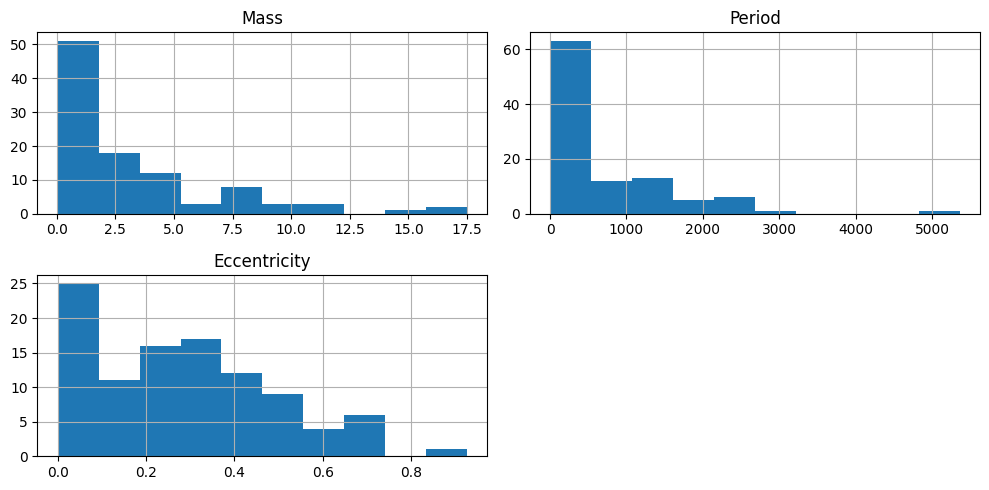

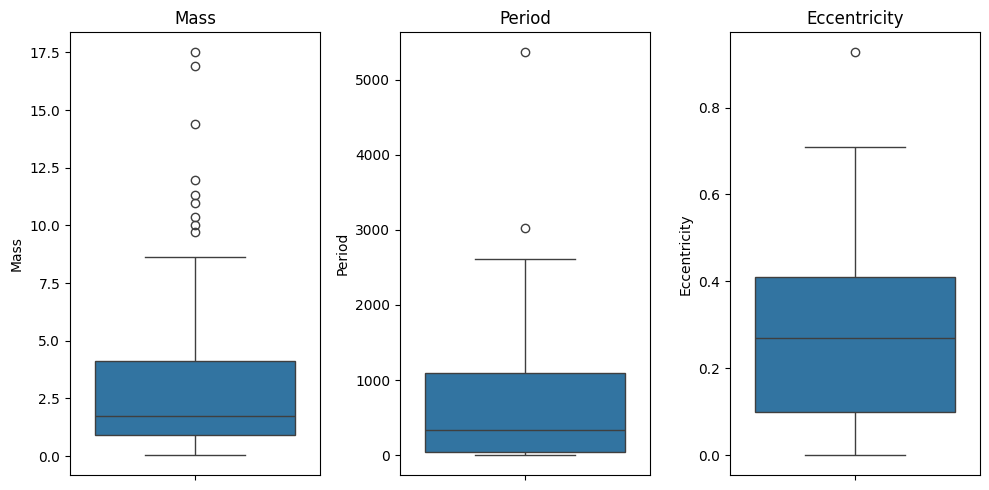

In [6]:
# Histograms
df.hist(bins=10, figsize=(10, 5))
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Mass'])
plt.title('Mass')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Period'])
plt.title('Period')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Eccentricity'])
plt.title('Eccentricity')

plt.tight_layout()
plt.show()

### Bivariate Relationships

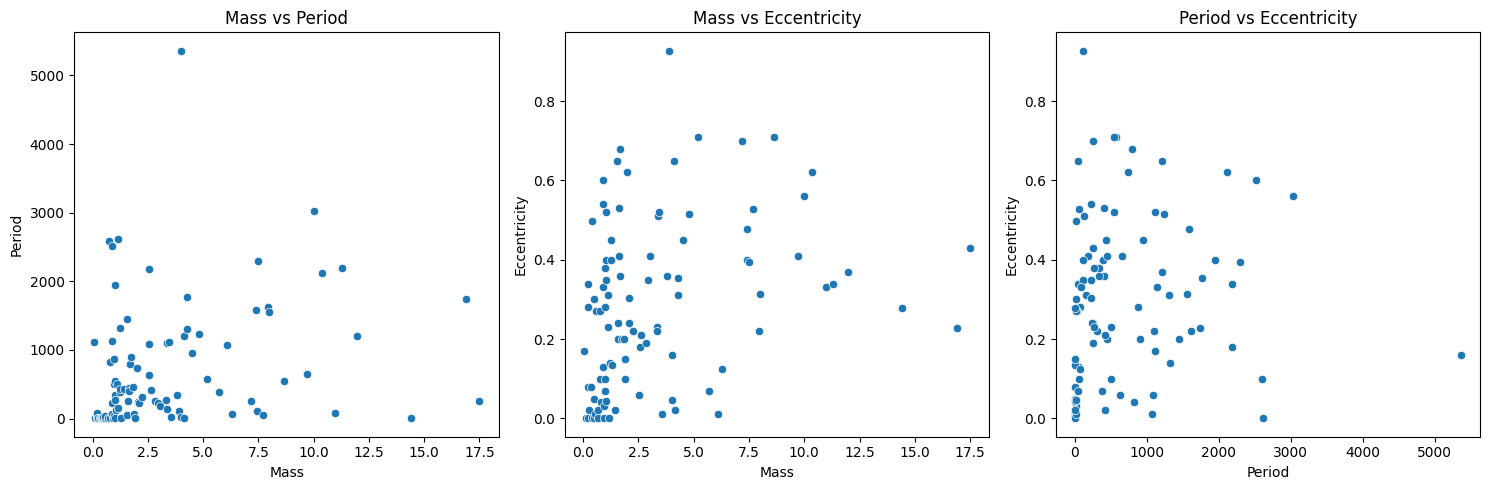

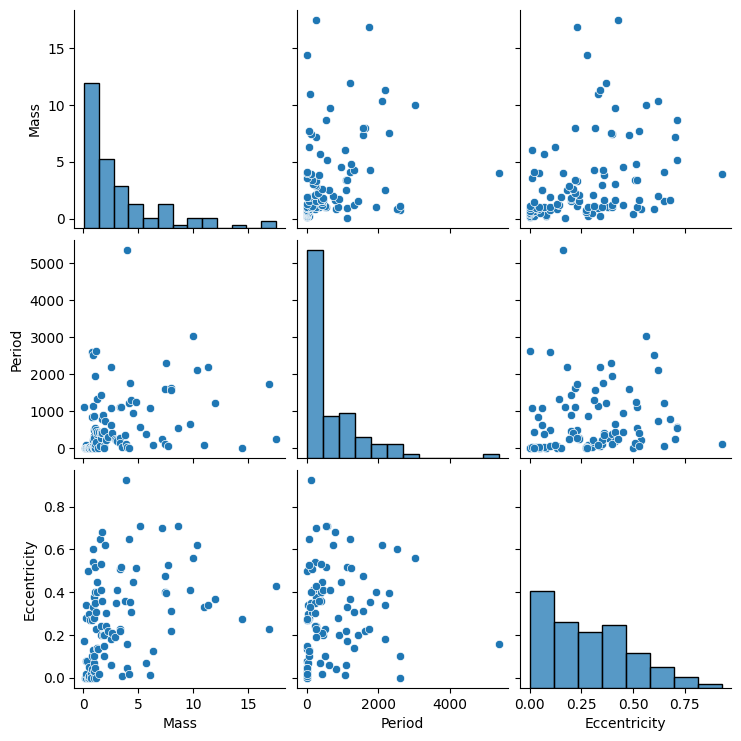

In [7]:
# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Mass', y='Period', data=df)
plt.title('Mass vs Period')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Mass', y='Eccentricity', data=df)
plt.title('Mass vs Eccentricity')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Period', y='Eccentricity', data=df)
plt.title('Period vs Eccentricity')

plt.tight_layout()
plt.show()

# Pair plot
sns.pairplot(df)
plt.show()

### Correlation Matrix

                  Mass    Period  Eccentricity
Mass          1.000000  0.268409      0.304933
Period        0.268409  1.000000      0.144593
Eccentricity  0.304933  0.144593      1.000000


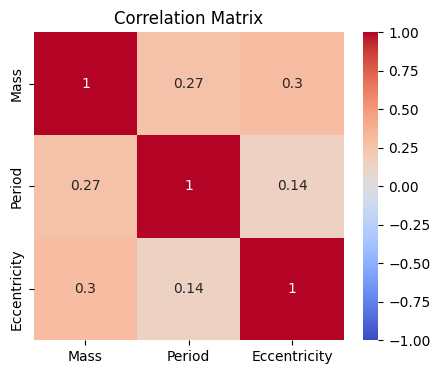

In [12]:
# Correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

There is a weak positive correlation between Mass and Period, Mass and Eccentricity, and Period and Eccentricity.
The correlations are not very strong, suggesting that these variables may not be highly dependent on each other linearly.

## b)  Do you think standardizing the variables before clustering would be a good idea? Justify your answer.

Standardizing the variables before clustering is good when the variables are on different scales or have different units of measurement.

1. Different Scales of Variables

  In the planets dataset, the variables 'Mass', 'Period', and 'Eccentricity' are on different scales and different units of measurement.

          Mass ranges from 0.120 to 0.230 in jupyter mass.
          Period ranges from 3.971 to 75.800 in earth days.
          Eccentricity ranges from 0.00 to 0.34.

  The 'Period' variable has a much larger range compared to 'Mass' and 'Eccentricity'. Without standardization, clustering algorithms that rely on distance metrics (like K-means) will be disproportionately influenced by 'Period' because its numerical values are much larger.

2. Euclidean Distance Sensitivity
  
  Clustering algorithms like K-means use Euclidean distance to assign points to clusters. Variables with larger ranges can dominate the distance calculations, leading to clusters that do not reflect the actual structure of the data. Standardizing the data ensures that each variable contributes equally to the distance calculations.

3. Interpretability and Comparison
  
  Standardization converts variables to a common scale, usually with a mean of 0 and a standard deviation of 1. This makes it easier to interpret the results and compare the importance of different variables in the clustering process.

Therefore, standardizing the data before applying clustering algorithms is a good practice. This will prevent any one variable from disproportionately influencing the results and will ensure that the clustering is based on the intrinsic structure of the data.

### Standardization of data

In [9]:
# Standardizing the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Converting back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)
print(df_standardized.describe())

               Mass        Period  Eccentricity
count  1.010000e+02  1.010000e+02  1.010000e+02
mean   3.517538e-17 -7.639653e-17  3.407615e-17
std    1.004988e+00  1.004988e+00  1.004988e+00
min   -8.948628e-01 -7.632113e-01 -1.341363e+00
25%   -6.545789e-01 -7.157137e-01 -8.649379e-01
50%   -4.279475e-01 -3.789005e-01 -5.501530e-02
75%    2.219111e-01  4.859238e-01  6.119798e-01
max    3.869857e+00  5.398430e+00  3.075097e+00


## c)  Would you use metric-based or correlation-based distance to cluster the exoplanets? Justify your answer.


The choice between metric-based and correlation-based distance for clustering depends on the nature of the data and the specific characteristics to be captured in the clustering process.

Metric-based distances (e.g., Euclidean distance) measure the direct spatial distance between data points. It is used when:


1. There are Magnitude Differences

  If the absolute differences in values are important. For example, if the difference between a 'Period' of 3.971 days and 75.800 days is significant for clustering purposes, metric-based distance is suitable.
2. There are Standardized Data

 When the data is standardized, metric-based distances are effective in capturing the overall differences between points on a common scale.
3. There are Clusters with Spherical Shapes

  Metric-based distances work well with algorithms like K-means, which assume clusters are spherical and of similar size.

Correlation-based distances measure the similarity in the pattern of relationships between variables, regardless of their magnitude. It is used when:
1. There is a Pattern Similarity

  If there is a high interest to know how variables change together rather than their absolute values. For instance, if cluster exoplanets are to be clustered based on similar trends in 'Mass', 'Period', and 'Eccentricity', correlation-based distance is appropriate.

2. There is Scale Independence
  
  Correlation-based distances are scale-invariant, meaning that they can capture relationships even if the data is not standardized or if the variables are on vastly different scales.

3. Non-Spherical Clusters
  
  Correlation-based distances can be useful for identifying clusters that are not necessarily spherical but show similar patterns in data.

Since the variables have a weak linear correlation and are standardised because of their differences in units of measurement, metric-based distance calculation would fit better to the dataset.

# Metric-based Distance

In [10]:
# Standardizing the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df)

# Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_standardized)

# Adding cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_
df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Mass,Period,Eccentricity,Cluster
0,0.120,4.950000,0.000,0
1,0.197,3.971000,0.000,0
2,0.210,44.280000,0.340,0
3,0.220,75.800000,0.280,0
4,0.230,6.403000,0.080,0
...,...,...,...,...
96,11.300,2189.000000,0.340,2
97,11.980,1209.000000,0.370,2
98,14.400,8.428198,0.277,2
99,16.900,1739.500000,0.228,2


## d)  Regardless of your answers in (b) and (c), standardize the variables and hierarchically cluster the exoplanets using complete linkage and Euclidean distance. Display the results using a dendogram. Cut the dendogram at a height that results in three distinct clusters. Summarize the cluster-specific means of the three variables (on the original scale) in a tabular form. Also, make pairwise scatterplots of the three variables (on the original scale) and show the three clusters in different colors.

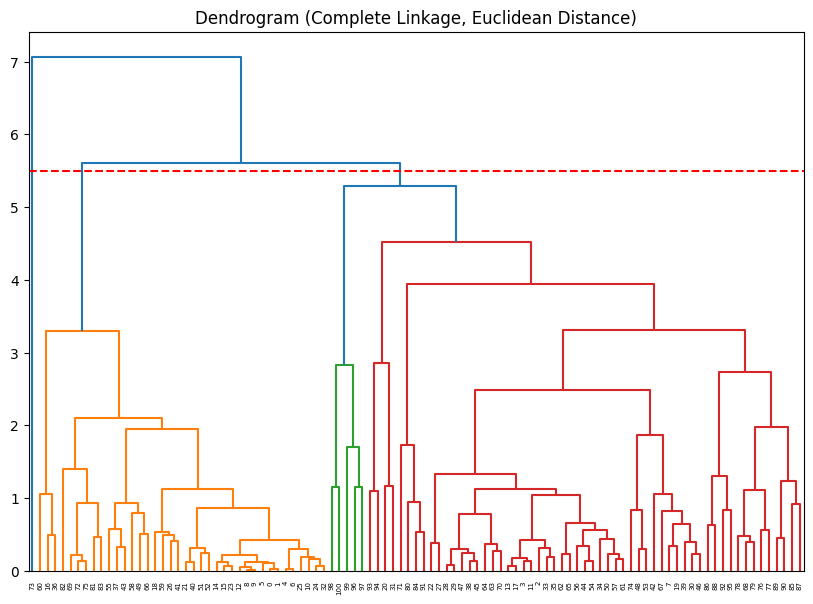

In [13]:
# Perform hierarchical clustering using complete linkage and Euclidean distance
linked = sch.linkage(df_standardized, method='complete')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(linked)
plt.title('Dendrogram (Complete Linkage, Euclidean Distance)')
plt.axhline(y=5.5, color='r', linestyle='--')
plt.show()

# Cut the dendrogram to form three clusters
clusters = fcluster(linked, 3, criterion='maxclust')

             Mass       Period  Eccentricity
Cluster                                     
1        1.703316   488.747927      0.070771
2        4.311774   699.794116      0.412694
3        4.000000  5360.000000      0.160000


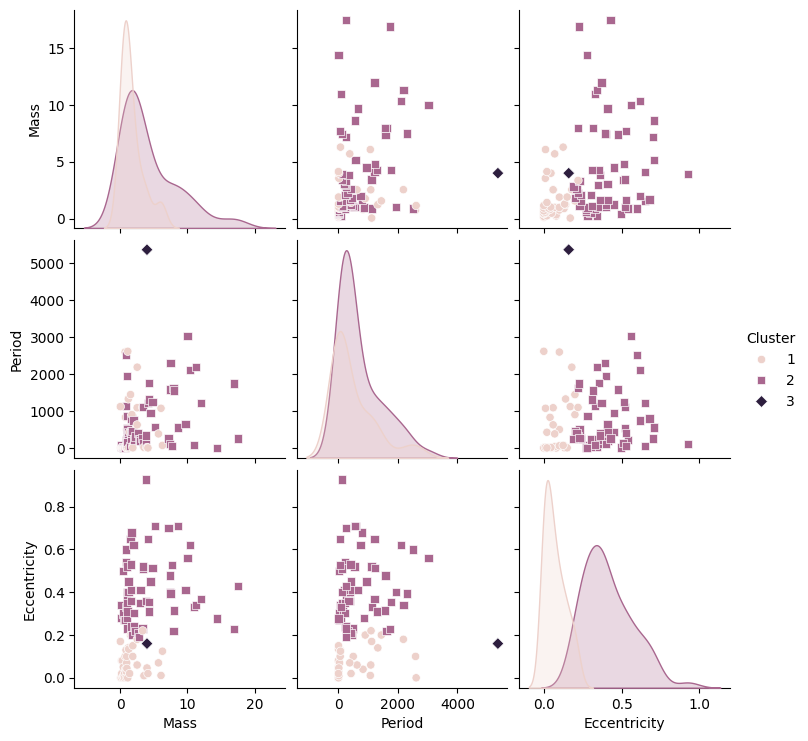

In [14]:
# Add cluster labels to the original DataFrame
df['Cluster'] = clusters

# Summarize the cluster-specific means of the three variables (on the original scale)
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters in pairwise scatter plots
sns.pairplot(df, hue='Cluster', markers=["o", "s", "D"])
plt.show()

## e)  Repeat (d) using $K$-means clustering with $K=3$. (Of course, you won't have a dendogram in this case.) Compare the conclusions with (d).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              Mass       Period  Eccentricity
Cluster                                      
0         1.644000   420.610023      0.125987
1         3.010000   633.403242      0.500061
2        10.567857  1693.172014      0.366500


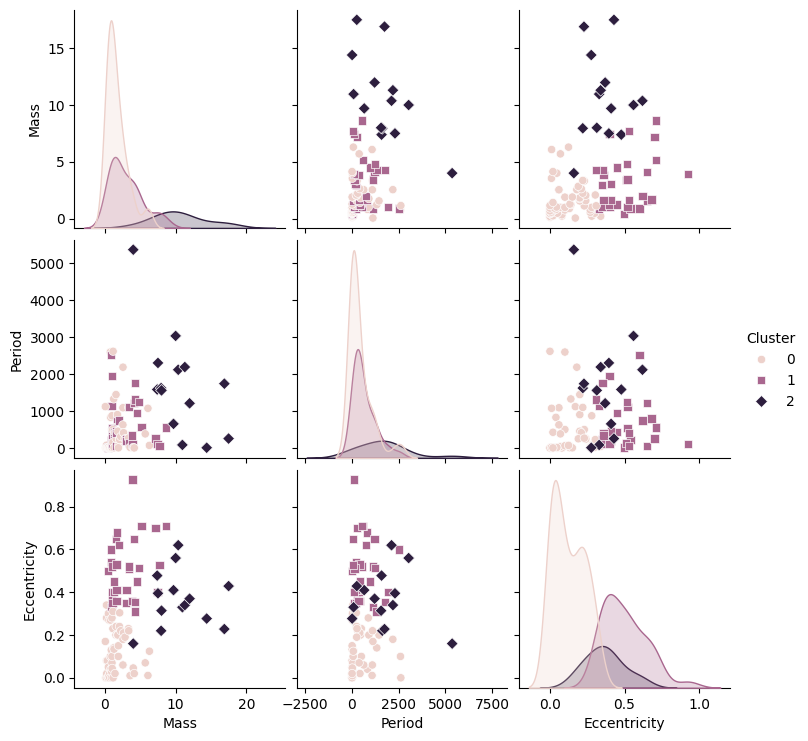

In [19]:
# Perform K-means clustering with K=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

# Summarize the cluster-specific means of the three variables (on the original scale)
df['Cluster'] = clusters
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

# Define custom colors for the clusters
custom_palette = {1: 'blue', 2: 'green', 3: 'red'}

# Visualize the clusters in pairwise scatter plots
sns.pairplot(df, hue='Cluster', markers=["o", "s", "D"])
plt.show()

### Conclusion

In $K$-means clustering, clusters are formed based on the centroids, whereas in hierarchical clustering, clusters are formed based on distance.

Cluster Means for Hierarchical Clustering

| Cluster |      Mass    |    Period   | Eccentricity |
|---------|--------------|-------------|--------------|
|    1    |   1.703      |   488.75    |    0.071     |
|    2    |   4.312      |   699.79    |    0.413     |
|    3    |   4.000      |  5360.00    |    0.160     |

Cluster Means for K-means Clustering (K=3)

| Cluster |      Mass    |    Period   | Eccentricity |
|---------|--------------|-------------|--------------|
|    0    |   1.644      |   420.61    |    0.126     |
|    1    |   3.010      |   633.40    |    0.500     |
|    2    |  10.568      |  1693.17    |    0.367     |


The conclusions drawn from $K$-means clustering is different compared to hierarchical clustering because of the clustering algorithm's behavior.
